<a href="https://colab.research.google.com/github/BATspock/deeplearning/blob/master/PytorchWorkingwithDatasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline

import torch
import numpy as np
import pandas as pd

In [2]:
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda
import matplotlib.pyplot as plt

training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw




Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw




Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw




Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [10]:
len(training_data), len(test_data)

(60000, 10000)

In [13]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


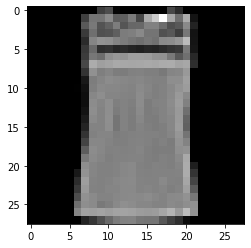

Label: 0


In [15]:
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

In [16]:
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda

ds = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=Lambda(lambda y: torch.zeros(10, dtype=torch.float).scatter_(0, torch.tensor(y), value=1))
)

# Build a model

In [1]:
import os
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [18]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print('Using {} device'.format(device))

Using cpu device


In [22]:
class NeuralNetworks(nn.Module):
  def __init__(self):
    super(NeuralNetworks, self).__init__()
    self.flatten = nn.Flatten()
    self.linear_relu_stack = nn.Sequential(
        nn.Linear(28*28, 512),
        nn.ReLU(),
        nn.Linear(512, 512),
        nn.ReLU(),
        nn.Linear(512, 10),
        nn.ReLU()

    ) 

  def forward(self, x):
    x = self.flatten(x)
    logits = self.linear_relu_stack(x)
    return logits

In [23]:
model = NeuralNetworks().to(device)
print(model)

NeuralNetworks(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
    (5): ReLU()
  )
)


In [26]:
X = torch.rand(1,28,28, device=device)
logits = model(X)
pred_prob = nn.Softmax(dim=1)(logits)
y_pred = pred_prob.argmax(1)
print(f"Predicted class: {y_pred}")

Predicted class: tensor([8])


In [27]:
input_image = torch.rand(3,28,28)
print(input_image.size())

torch.Size([3, 28, 28])


In [28]:
flatten = nn.Flatten()
flat_image = flatten(input_image)
print(flat_image.shape)

torch.Size([3, 784])


In [38]:
layer1 = nn.Linear(in_features=28*28, out_features=20)
hidden1 = layer1(flat_image)
print(hidden1.size())

torch.Size([3, 20])


In [39]:
print(f"Before ReLU: {hidden1}\n\n")
hidden1 = nn.ReLU()(hidden1)
print(f"After ReLU: {hidden1}")

Before ReLU: tensor([[-1.7288e-01,  2.7429e-01, -1.4475e-01,  3.4841e-01, -8.6087e-02,
          1.9874e-01,  2.0208e-01, -2.2174e-01, -2.9477e-02,  1.5196e-01,
         -4.1652e-01, -9.2689e-02, -3.3330e-01,  1.0697e-01,  6.6634e-02,
          1.2569e-01, -3.8212e-02,  7.7262e-01,  2.2035e-01, -1.9532e-02],
        [-4.0356e-02,  1.2674e-01,  1.9877e-02,  4.0488e-01, -6.6608e-02,
          6.0728e-01,  1.5443e-01, -2.4334e-01,  4.5059e-02,  1.3967e-01,
         -5.5792e-01, -4.0958e-01, -1.2952e-01, -2.0638e-01,  6.8600e-02,
          5.7256e-01, -1.6015e-01,  5.9346e-01,  2.0550e-01,  1.0464e-01],
        [-4.0751e-02,  3.0223e-01,  1.9194e-01,  4.6507e-01, -2.5840e-02,
          1.0011e-01,  2.6035e-01, -2.9804e-01, -1.7438e-01,  2.3300e-02,
         -5.1024e-01,  2.1454e-01, -2.3359e-01,  1.5862e-01,  2.4500e-01,
          3.1591e-01,  1.7836e-01,  6.8047e-01, -4.9312e-04,  3.7691e-02]],
       grad_fn=<AddmmBackward>)


After ReLU: tensor([[0.0000, 0.2743, 0.0000, 0.3484, 0.0000, 

In [40]:
Seq_model = nn.Sequential(
    flatten,
    layer1,
    nn.ReLU(),
    nn.Linear(20,10)
)

input_image = torch.rand(3,28,28)
logits = Seq_model(input_image)

In [41]:
softmax = nn.Softmax(dim=1)
pred_prob = softmax(logits)

# Autograd


In [2]:
%matplotlib inline 

In [3]:
x = torch.ones(5)
y = torch.zeros(3)
w = torch.randn(5, 3, requires_grad=True)
b = torch.randn(3, requires_grad=True)
z = torch.matmul(x, w) + b

In [4]:
x, y, w, b, z

(tensor([1., 1., 1., 1., 1.]),
 tensor([0., 0., 0.]),
 tensor([[-0.2979,  0.0511, -0.7757],
         [-0.1073,  0.0693,  0.5586],
         [ 0.0045,  0.9314, -0.1644],
         [-0.7306, -0.6615, -0.3389],
         [-0.5034,  0.5860, -0.9933]], requires_grad=True),
 tensor([ 1.8866, -1.1433,  0.3657], requires_grad=True),
 tensor([ 0.2519, -0.1670, -1.3481], grad_fn=<AddBackward0>))

In [5]:
loss = torch.nn.functional.binary_cross_entropy_with_logits(z, y)

In [6]:
z.grad_fn

In [7]:
loss.backward()

In [8]:
print(w.grad)

tensor([[0.1876, 0.1528, 0.0687],
        [0.1876, 0.1528, 0.0687],
        [0.1876, 0.1528, 0.0687],
        [0.1876, 0.1528, 0.0687],
        [0.1876, 0.1528, 0.0687]])


In [9]:
print(b.grad)

tensor([0.1876, 0.1528, 0.0687])
